In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sys
import os
import json 

# make paths above 'notebooks/' visible for local imports.
# +----------------------------------------------------------------------------+
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src import plotting
from src.feature_selection import CustomRFECV


In [2]:
datadir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/feature_selection'
pfeats = os.path.join(datadir, 'rfecvP_diffSeeds')
sfeats = os.path.join(datadir, 'rfecvS_diffSeeds')

p_rfecv_best = pd.read_csv(os.path.join(pfeats, 'feature.importance.rfecv.best.csv'))
p_rfecv_oste = pd.read_csv(os.path.join(pfeats, 'feature.importance.rfecv.oste.csv'))
p_rfefull_best = pd.read_csv(os.path.join(pfeats, 'feature.importance.rfe.full.best.csv'))
p_rfefull_oste = pd.read_csv(os.path.join(pfeats, 'feature.importance.rfe.full.oste.csv'))

s_rfecv_best = pd.read_csv(os.path.join(sfeats, 'feature.importance.rfecv.best.csv'))
s_rfecv_oste = pd.read_csv(os.path.join(sfeats, 'feature.importance.rfecv.oste.csv'))
s_rfefull_best = pd.read_csv(os.path.join(sfeats, 'feature.importance.rfe.full.best.csv'))
s_rfefull_oste = pd.read_csv(os.path.join(sfeats, 'feature.importance.rfe.full.oste.csv'))

p_lowcorr = pd.read_csv(os.path.join(datadir, 'lowcorr', 'feature.counts.P.csv'))
s_lowcorr = pd.read_csv(os.path.join(datadir, 'lowcorr', 'feature.counts.S.csv'))

# RFECV Results - Best N

In [3]:
p_rfecv_best.shape

(45, 36)

In [4]:
s_rfecv_best.shape

(45, 19)

In [5]:
plotting.set_default_fontsizes(SMALL_SIZE=8, MEDIUM_SIZE=9)

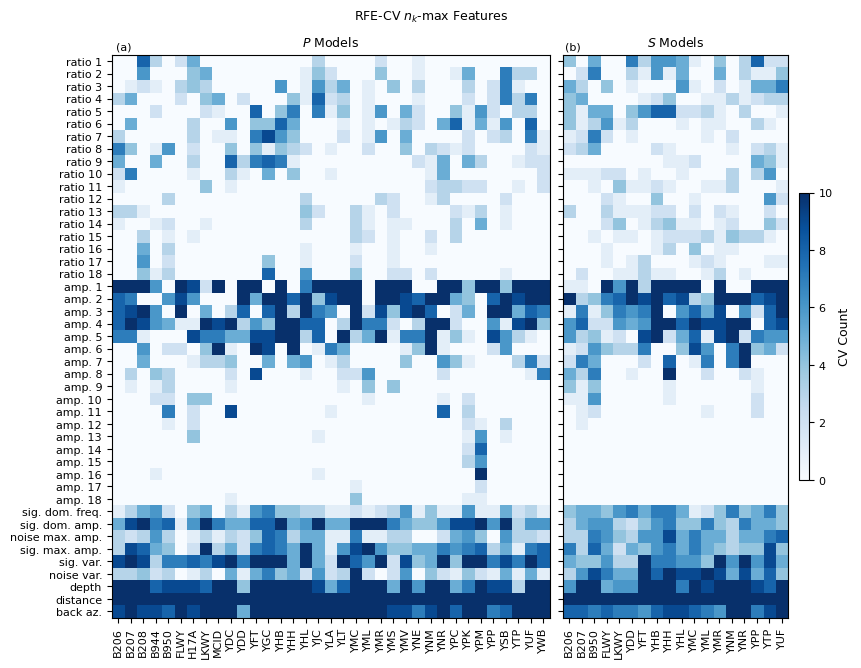

In [6]:
plotting.plot_feature_heatmaps_sidebyside(p_rfecv_best, s_rfecv_best,
                        colorbarlabel='CV Count',
                        figsize=(8.5, 6.6),
                        fontsize=None,
                        title='RFE-CV $\it{n_k}$-max Features',
                        savefigname='../figures/feats_heatmaps_RFECV_best.png')

# RFECV Results - OSTE N

In [7]:
p_rfecv_oste.shape

(45, 36)

In [8]:
s_rfecv_oste.shape

(45, 19)

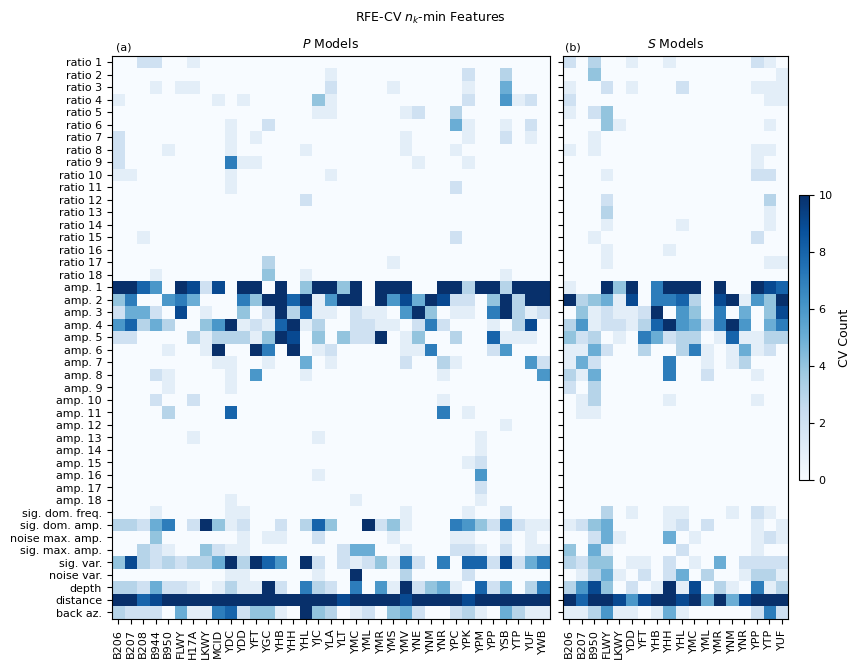

In [9]:
plotting.plot_feature_heatmaps_sidebyside(p_rfecv_oste, s_rfecv_oste,
                        colorbarlabel='CV Count',
                        figsize=(8.5, 6.6),
                        fontsize=None,
                        title='RFE-CV $\it{n_k}$-min Features',
                        savefigname='../figures/feats_heatmaps_RFECV_oste.png')

# RFE Full - Best N

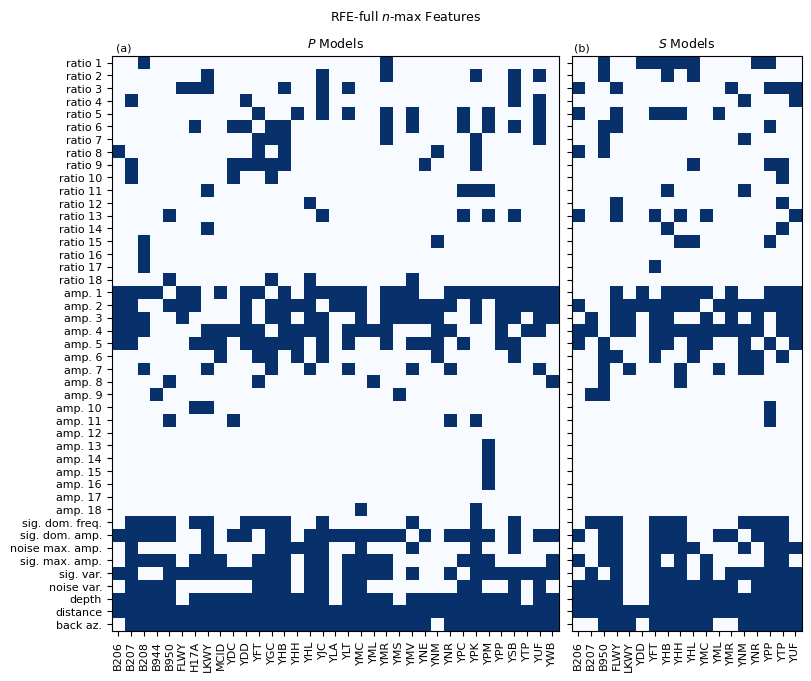

In [10]:
plotting.plot_feature_heatmaps_sidebyside(p_rfefull_best, s_rfefull_best,
                        colorbar=False,                     
                        figsize=(8.0, 6.7),
                        fontsize=None,
                        title='RFE-full $\it{n}$-max Features',
                        savefigname='../figures/feats_heatmaps_RFEfull_best.png')

# RFE Full - OSTE N

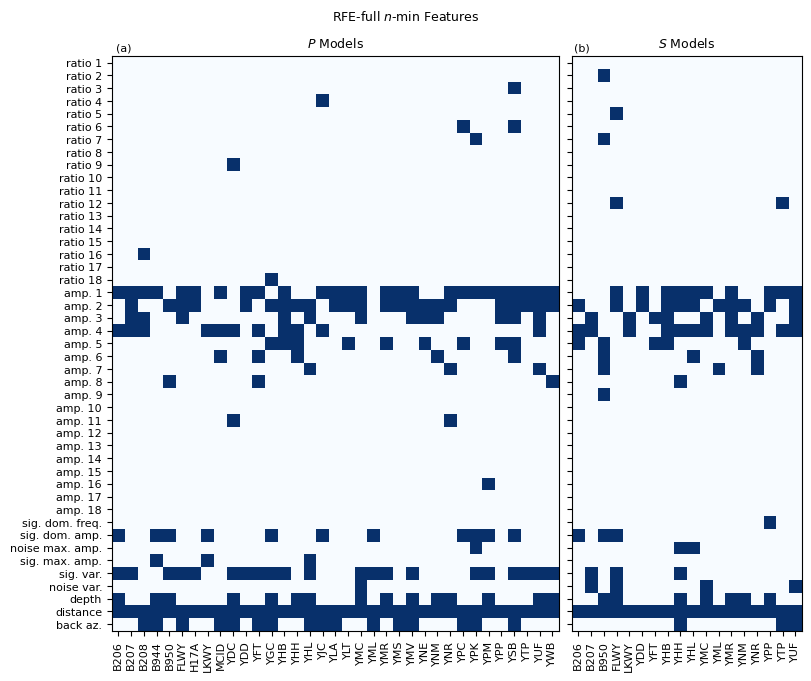

In [11]:
plotting.plot_feature_heatmaps_sidebyside(p_rfefull_oste, s_rfefull_oste,
                        colorbar=False,                     
                        figsize=(8.0, 6.7),
                        fontsize=None,
                        title='RFE-full $\it{n}$-min Features',
                        savefigname='../figures/feats_heatmaps_RFEfull_oste.png')

# Low correlation features

In [12]:
p_lowcorr = p_lowcorr.rename(columns={'Unnamed: 0':'Feature'})
s_lowcorr = s_lowcorr.rename(columns={'Unnamed: 0':'Feature'})

In [13]:
p_lowcorr.columns

Index(['Feature', 'YHB', 'YDC', 'YWB', 'MCID', 'YHL', 'YMR', 'YHH', 'B207',
       'YPP', 'YPM', 'YLT', 'H17A', 'B208', 'LKWY', 'FLWY', 'YGC', 'YMC',
       'YML', 'YUF', 'B206', 'B944', 'YLA', 'YTP', 'YNR', 'YNM', 'YFT', 'YMV',
       'YPC', 'YSB', 'YJC', 'YMS', 'YNE', 'YPK', 'B950', 'YDD'],
      dtype='object')

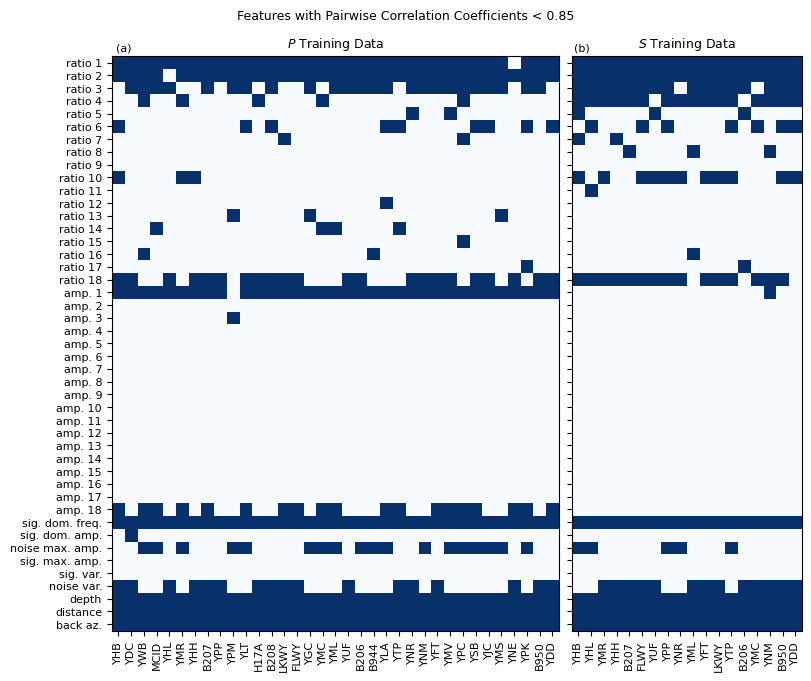

In [14]:
plotting.plot_feature_heatmaps_sidebyside(p_lowcorr, s_lowcorr,
                        colorbar=False,                     
                        figsize=(8.0, 6.7),
                        fontsize=None,
                        title='Features with Pairwise Correlation Coefficients < 0.85',
                        p_title='$\it{P}$ Training Data',
                        s_title='$\it{S}$ Training Data',
                        savefigname='../figures/feats_heatmaps_lowcorr.png')